In [18]:
# pip install yellobrick
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA

from yellowbrick.features.pca import PCADecomposition

import warnings
warnings.filterwarnings('ignore')

In [19]:
def pca_results(good_data, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''

    # Dimension indexing
    dimensions = dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]

    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = list(good_data.keys()))
    components.index = dimensions

    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions

    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))

    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)


    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
        ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n          %.4f"%(ev))

    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

In [20]:
location = r'E:\MYLEARN\2-ANALYTICS-DataScience\datasets\credit.csv'

In [21]:
df_credit = pd.read_csv(location)
df_credit.shape

(30000, 24)

In [22]:
# split X & y
X_credit = df_credit.drop(['default'], axis=1)
y_credit = df_credit.default

In [23]:
X_credit.shape

(30000, 23)

In [24]:
y_credit.value_counts()

0    23364
1     6636
Name: default, dtype: int64

In [25]:
# Create a list of colors to assign to points in the plot
colors_credit = np.array(['g' if yi else 'r' for yi in y_credit])

In [26]:
colors_credit.shape

(30000,)

#### yellowbrick.features.pca.PCADecomposition(ax=None, features=None, scale=True, proj_dim=2, proj_features=False, color=None, colormap='RdBu', random_state=None, **kwargs)[

__Parameters:	__
- __features__: list, default: None
> a list of feature names to use If a DataFrame is passed to fit and features is None, feature names are selected as the columns of the DataFrame.

- __scale:__bool, default: True, Boolean that indicates if user wants to scale data.

- __proj_dim:__int, default: 2, Dimension of the PCA visualizer.

- __proj_features:__ bool, default: False, Boolean that indicates if the user wants to project the features in the projected space. 

- __color:__list or tuple of colors, default: None, Specify the colors for each individual class.

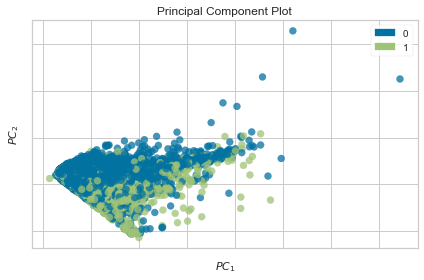

In [27]:
visualizer = PCADecomposition(scale=True, color=colors_credit)


visualizer.fit_transform(X_credit, y_credit)

visualizer.poof()

The PCA projection can also be plotted in __3 dimensions__ to attempt to visualize more principal components and get a better sense of the distribution in high dimensions.

<IPython.core.display.Javascript object>


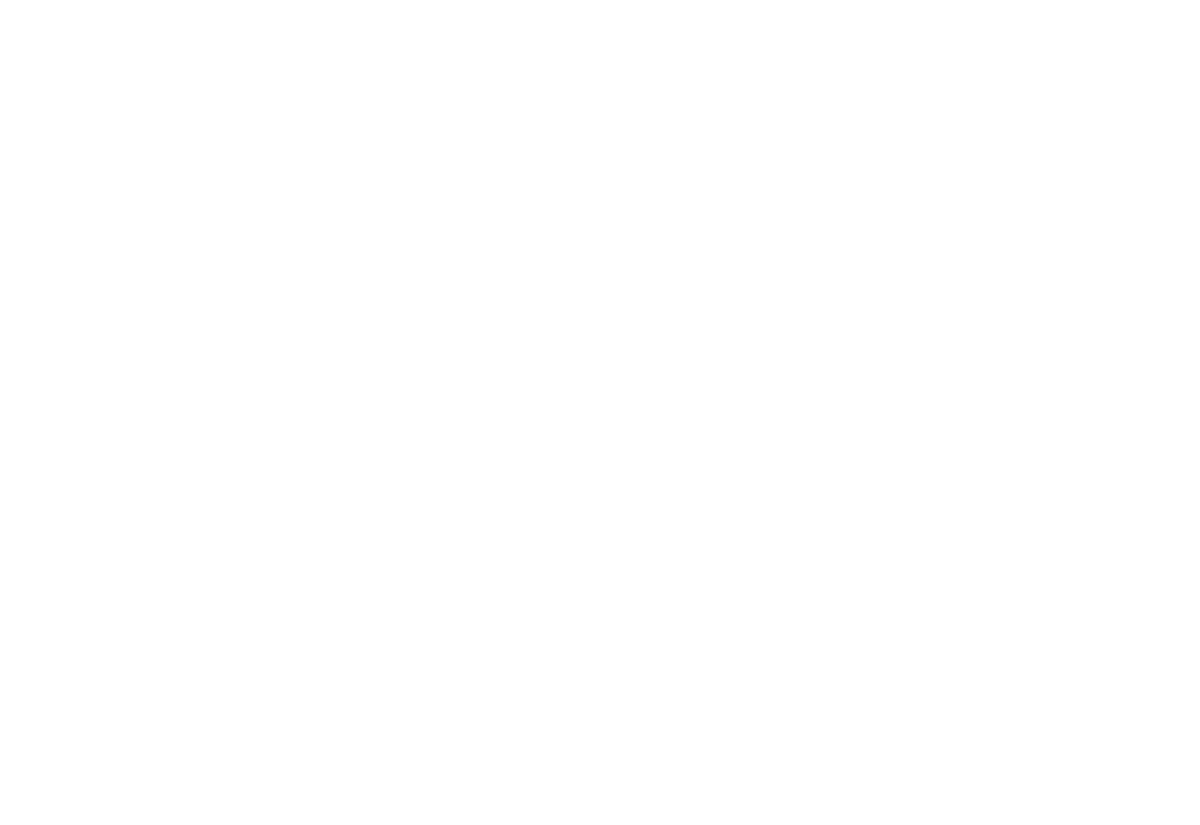

In [28]:
%matplotlib notebook
visualizer = PCADecomposition(scale=True, color=colors_credit, proj_features=True, proj_dim=3)

visualizer.fit_transform(X_credit, y_credit)

visualizer.poof()

#### Biplot

> The PCA projection can be enhanced to a biplot whose points are the projected instances and whose vectors represent the structure of the data in high dimensional space. By using the proj_features=True flag, vectors for each feature in the dataset are drawn on the scatter plot in the direction of the maximum variance for that feature. 

> These structures can be used to analyze the __importance of a feature to the decomposition__ 

YellowbrickValueError: Colormap spectral is not recognized. Possible values are: Accent, Accent_r, Blues, Blues_r, BrBG, BrBG_r, BuGn, BuGn_r, BuPu, BuPu_r, CMRmap, CMRmap_r, Dark2, Dark2_r, GnBu, GnBu_r, Greens, Greens_r, Greys, Greys_r, OrRd, OrRd_r, Oranges, Oranges_r, PRGn, PRGn_r, Paired, Paired_r, Pastel1, Pastel1_r, Pastel2, Pastel2_r, PiYG, PiYG_r, PuBu, PuBuGn, PuBuGn_r, PuBu_r, PuOr, PuOr_r, PuRd, PuRd_r, Purples, Purples_r, RdBu, RdBu_r, RdGy, RdGy_r, RdPu, RdPu_r, RdYlBu, RdYlBu_r, RdYlGn, RdYlGn_r, Reds, Reds_r, Set1, Set1_r, Set2, Set2_r, Set3, Set3_r, Spectral, Spectral_r, Wistia, Wistia_r, YlGn, YlGnBu, YlGnBu_r, YlGn_r, YlOrBr, YlOrBr_r, YlOrRd, YlOrRd_r, afmhot, afmhot_r, autumn, autumn_r, binary, binary_r, bone, bone_r, brg, brg_r, bwr, bwr_r, cividis, cividis_r, cool, cool_r, coolwarm, coolwarm_r, copper, copper_r, cubehelix, cubehelix_r, flag, flag_r, gist_earth, gist_earth_r, gist_gray, gist_gray_r, gist_heat, gist_heat_r, gist_ncar, gist_ncar_r, gist_rainbow, gist_rainbow_r, gist_stern, gist_stern_r, gist_yarg, gist_yarg_r, gnuplot, gnuplot2, gnuplot2_r, gnuplot_r, gray, gray_r, hot, hot_r, hsv, hsv_r, inferno, inferno_r, jet, jet_r, magma, magma_r, nipy_spectral, nipy_spectral_r, ocean, ocean_r, pink, pink_r, plasma, plasma_r, prism, prism_r, rainbow, rainbow_r, seismic, seismic_r, spring, spring_r, summer, summer_r, tab10, tab10_r, tab20, tab20_r, tab20b, tab20b_r, tab20c, tab20c_r, terrain, terrain_r, twilight, twilight_r, twilight_shifted, twilight_shifted_r, viridis, viridis_r, winter, winter_r

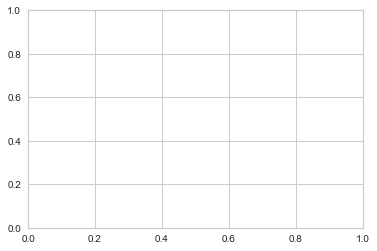

In [29]:
%matplotlib inline
visualizer = PCADecomposition(scale=True, proj_features=True, color=colors_credit, colormap='spectral')

visualizer.fit_transform(X_credit, y_credit)

visualizer.poof()

#### Using Iris data

In [30]:
location = r"E:\\MYLEARN\\2-ANALYTICS-DataScience\\datasets\\iris.csv"

In [31]:
# load the training data from iris.txt
df = pd.read_csv(location )

In [32]:
class_num = {"class":     {"Iris-setosa":     0, 
                           "Iris-virginica":  1,
                           "Iris-versicolor": 2 }}

In [33]:
df.replace(class_num, inplace=True)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [34]:
X = df.drop(['class'], axis=1)
y = df['class']


In [35]:
type(X)

pandas.core.frame.DataFrame

In [36]:
# Create a list of colors to assign to points in the plot
colors = np.array(['r' if yi==0 else 'b' if yi==1 else 'y' for yi in y])

In [37]:
pca = PCA(n_components=4)
pc = pca.fit_transform(X)

pc_df = pd.DataFrame(data = pc , 
                     columns = ['PC1', 'PC2','PC3','PC4'])

pc_df['Cluster'] = y

In [38]:
pca_results(good_data=X, pca=pc_df)

AttributeError: 'DataFrame' object has no attribute 'components_'

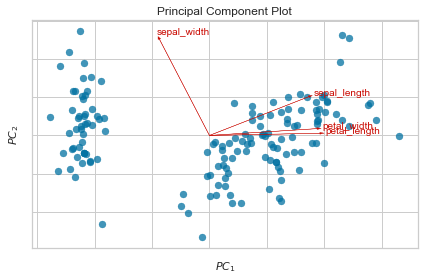

In [39]:
visualizer = PCADecomposition(proj_features=True, color=colors, proj_dim=2)
visualizer.fit_transform(X)
visualizer.poof()



<IPython.core.display.Javascript object>


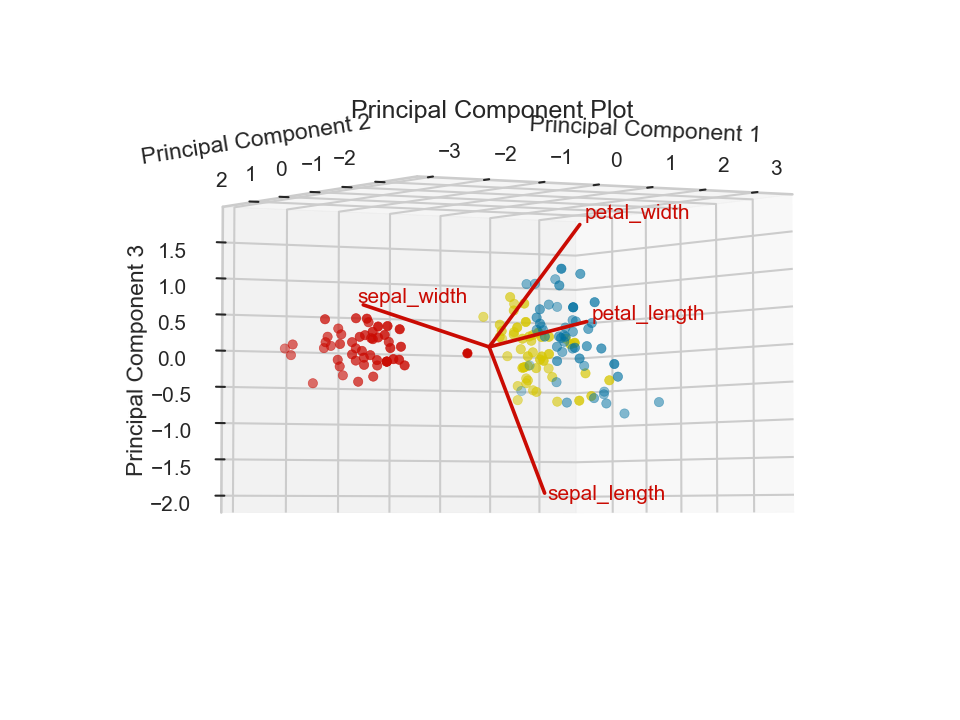

In [23]:
%matplotlib notebook
visualizer = PCADecomposition(proj_features=True, color=colors, proj_dim=3)
visualizer.fit_transform(X)
visualizer.poof()